<a href="https://colab.research.google.com/github/just-another-kirill-ilichev/bsuir-signal-processing-labs/blob/main/lab1_mfiots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
 
def draw_discrete_function_plot(func, start=0, stop=10):
  k = np.arange(start, stop)
  y = np.vectorize(func, otypes=[np.float])(k)
 
  plt.stem(k, y, use_line_collection=True)
  plt.show()
 
def draw_continuous_function_plot(func, start=0, stop=10, num=100):
  t = np.linspace(start, stop, num)
  y = np.vectorize(func, otypes=[np.float])(t)
 
  plt.plot(t, y)
  plt.show()

## Сигнал 1

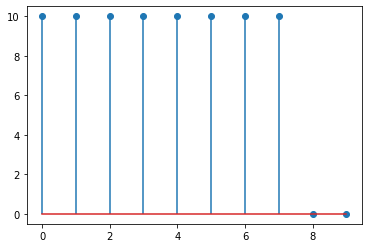

In [ ]:
S0 = 10
N0 = 8
 
def S1(k):
  return S0 if 0 <= k < N0 else 0
 
draw_discrete_function_plot(S1)

## Сигнал 2

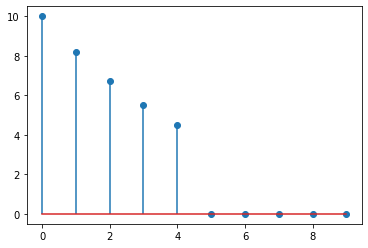

In [ ]:
S0 = 10
N0 = 5
a = math.exp(-0.2)

def S2(k):
  return S0 * math.pow(a, k) if 0 <= k < N0 else 0

draw_discrete_function_plot(S2)

## Сигнал 3

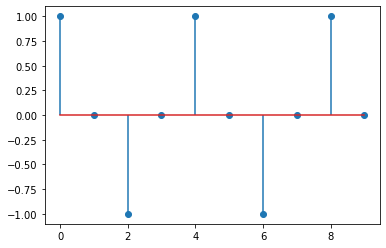

In [ ]:
N0 = 11
a1, a2 = 0, -1

def S3(k):
  if k == 0:
    return 1;

  return a1 * S3(k - 1) + a2 * S3(k - 2) if 0 <= k < N0 else 0

draw_discrete_function_plot(S3)

## Сигнал 4

Непрерывная форма

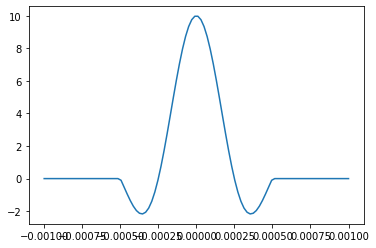

In [ ]:
T = 0.5 * 10**-3
S0 = 10
f0 = 2000

def S4(t):
  arg = 2 * math.pi * f0 * t
  return S0 * math.sin(arg) / arg if abs(t) <= T else 0

draw_continuous_function_plot(S4, start=-0.001, stop=0.001)

Дискретная форма

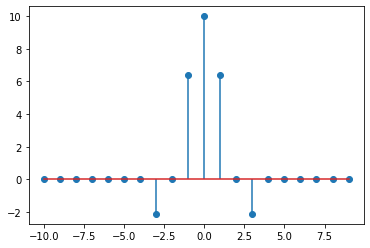

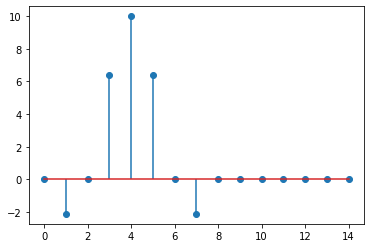

-2.1220659078919377
6.366197723675814
10


In [ ]:
n = 2 * T * f0
fd = 8 * 10 ** 3
N0 = 1 + 2 * T * fd
M = (N0 - 1) / n

def S4(k):
  arg = 2 * math.pi / M * k

  # там точка разрыва, но она устранимая
  if arg == 0:
    return S0

  return S0 * math.sin(arg) / arg if abs(k) <= (N0 - 1) / 2 else 0

draw_discrete_function_plot(S4, start=-10, stop=10)

def S4_offset(k):
  return S4(k - (N0 - 1) / 2)

draw_discrete_function_plot(S4_offset, stop=15)

print(S4_offset(1))
print(S4_offset(3))
print(S4_offset(4))

## Сигнал 5

Непрерывная форма

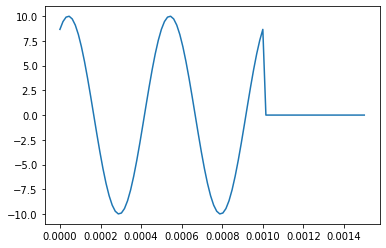

In [ ]:
S0 = 10
f0 = 2000
u0 = math.pi / 6
T = 0.001

def S5(t):
  return S0 * math.cos(2 * math.pi * f0 * t - u0) if 0 <= t <= T else 0

draw_continuous_function_plot(S5, stop=0.0015)

Дискретная форма

8.0


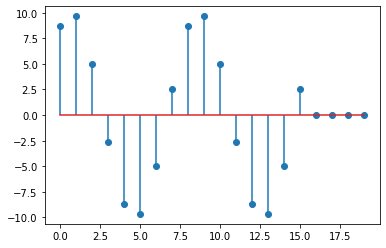

In [ ]:
N0 = 16
n = f0 * T
M = N0 / n

print(M)

def S5(k):
  return S0 * math.cos(2 * math.pi / M * k - u0) if 0 <= k < N0 else 0

draw_discrete_function_plot(S5, stop=20)